In [1]:
# The following code references from 
# https://github.com/yhat/DataGotham2013/tree/master/notebooks
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
pd.options.display.max_rows = 99
pd.options.display.max_columns = 6

# import pipline files:
import read
import explore
import clean
import gen_features
import classifier
import evaluate

#Global Variable:
explore.DEP_VAR ='SeriousDlqin2yrs'
explore.LEAD_VAR = 2
gen_features.DEP_VAR ='SeriousDlqin2yrs'
classifier.DEP_VAR ='SeriousDlqin2yrs'

/Users/ZHU/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Read/load data
df = read.read("credit-data.csv")
# Adjust data type -percentage
df.RevolvingUtilizationOfUnsecuredLines = df.RevolvingUtilizationOfUnsecuredLines*100
df.DebtRatio = df.DebtRatio*100
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,...,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,76.612661,...,6,0,2.0
1,2,0,95.715102,...,0,0,1.0
2,3,0,65.818014,...,0,0,0.0
3,4,0,23.380978,...,0,0,0.0
4,5,0,90.723940,...,1,0,0.0


In [3]:
d = explore.explore(df)
summary = d["summary"]
features = d["features"]

In [4]:
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'zipcode',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [5]:
# Summary statistics for the whole dataset
summary

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,...,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,1.500000e+05,...,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438e+02,...,1.018240,0.240387,0.757222
std,43301.414527,0.249746,2.497554e+04,...,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,2.986744e+00,...,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,1.541807e+01,...,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,5.590462e+01,...,2.000000,0.000000,1.000000
max,150000.000000,1.000000,5.070800e+06,...,54.000000,98.000000,20.000000


In [6]:
# Plot distribution for variable 'age', 'NumberOfOpenCreditLinesAndLoans' 
# and 'NumberOfDependents'with respect to 'SeriousDlqin2yrs'

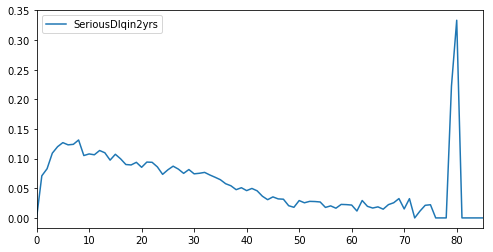

In [7]:
age_graph = explore.explore_var(df,'age','line')["graph"]

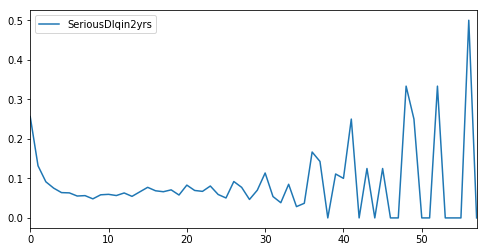

In [8]:
loan_graph = explore.explore_var(df,'NumberOfOpenCreditLinesAndLoans','line')["graph"]

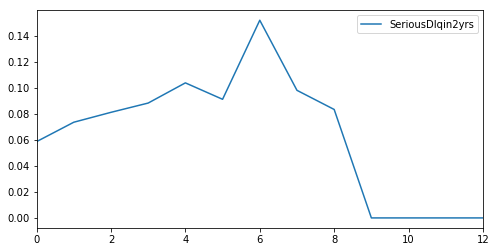

In [9]:
dependent_graph = explore.explore_var(df,'NumberOfDependents','line')["graph"]

In [10]:
#check the null value
clean.check_missing_data(df)

value,False,True
variable,,
DebtRatio,150000,0
MonthlyIncome,120269,29731
NumberOfDependents,146076,3924
NumberOfOpenCreditLinesAndLoans,150000,0
NumberOfTime30-59DaysPastDueNotWorse,150000,0
NumberOfTime60-89DaysPastDueNotWorse,150000,0
NumberOfTimes90DaysLate,150000,0
NumberRealEstateLoansOrLines,150000,0
PersonID,150000,0


In [11]:
#Check null values again after filling in missing values
df = clean.clean(df,'NumberOfDependents','zero')
df = clean.clean(df,'MonthlyIncome','mean')
clean.check_missing_data(df)

value,False
variable,
DebtRatio,150000
MonthlyIncome,150000
NumberOfDependents,150000
NumberOfOpenCreditLinesAndLoans,150000
NumberOfTime30-59DaysPastDueNotWorse,150000
NumberOfTime60-89DaysPastDueNotWorse,150000
NumberOfTimes90DaysLate,150000
NumberRealEstateLoansOrLines,150000
PersonID,150000


In [12]:
#Generate categorical bin boundary for selected variables
UnsecuredLines_bins = gen_features.generate_bins(df,'RevolvingUtilizationOfUnsecuredLines',5)
DebtRatio_bins = gen_features.generate_bins(df,'DebtRatio',10)
income_bins = gen_features.generate_bins(df,'MonthlyIncome',500)
age_bins = gen_features.generate_bins(df,'age',5)

df = gen_features.build_category(df,'RevolvingUtilizationOfUnsecuredLines',UnsecuredLines_bins)
df = gen_features.build_category(df,'DebtRatio',DebtRatio_bins)
df = gen_features.build_category(df,'MonthlyIncome',income_bins)
df = gen_features.build_category(df,'age',age_bins)

In [13]:
# Show df with newly added variables:
# "RevolvingUtilizationOfUnsecuredLines_bucket"
# "DebtRatio_bucket"
# "MonthlyIncome_bucket"
# "age_bucket"
df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,...,DebtRatio_bucket,MonthlyIncome_bucket,age_bucket
count,150000.000000,150000.000000,1.500000e+05,...,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438e+02,...,3.414867,4.042900,2.553033
std,43301.414527,0.249746,2.497554e+04,...,3.107104,2.869389,1.971429
min,1.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,2.986744e+00,...,1.000000,0.000000,0.000000
50%,75000.500000,0.000000,1.541807e+01,...,2.000000,6.000000,3.000000
75%,112500.250000,0.000000,5.590462e+01,...,7.000000,7.000000,5.000000
max,150000.000000,1.000000,5.070800e+06,...,8.000000,7.000000,5.000000


In [14]:
# Create dummy variables
DebtRatio_dummy = gen_features.create_dummy(df,'DebtRatio_bucket')
income_dummy = gen_features.create_dummy(df,'MonthlyIncome_bucket')
age_dummy = gen_features.create_dummy(df,'age_bucket')

In [15]:
# Concat the dummy variables to df
df_new = pd.concat([df, DebtRatio_dummy,income_dummy,age_dummy], axis=1)
df_new.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,...,age_bucket_3,age_bucket_4,age_bucket_5
0,1,1,76.612661,...,0,0,0
1,2,0,95.715102,...,0,0,0
2,3,0,65.818014,...,0,0,0
3,4,0,23.380978,...,0,0,0
4,5,0,90.723940,...,0,0,0


In [16]:
#Select model and train model
selected_features = [
 'RevolvingUtilizationOfUnsecuredLines',
 'DebtRatio_bucket_0',
 'DebtRatio_bucket_1',
 'DebtRatio_bucket_2',
 'DebtRatio_bucket_3',
 'DebtRatio_bucket_4',
 'DebtRatio_bucket_5',
 'DebtRatio_bucket_6',
 'DebtRatio_bucket_7',
 'DebtRatio_bucket_8',
 'MonthlyIncome_bucket_0',
 'MonthlyIncome_bucket_1',
 'MonthlyIncome_bucket_2',
 'MonthlyIncome_bucket_3',
 'MonthlyIncome_bucket_4',
 'MonthlyIncome_bucket_5',
 'MonthlyIncome_bucket_6',
 'MonthlyIncome_bucket_7',
 'age_bucket_0',
 'age_bucket_1',
 'age_bucket_2',
 'age_bucket_3',
 'age_bucket_4',
 'age_bucket_5']

In [17]:
(X_train, X_test, y_train, y_test) = classifier.form_train_test(df_new,selected_features,0.3)
(yhat, probs) = classifier.classifier("KNN",X_train, X_test, y_train)

In [18]:
# Evaluate KNN classifier/model
(confusion_matrix, report) = evaluate.evaluate(y_test, yhat)
confusion_matrix

Predicted,0,1
Actual,,
0,41316,2776
1,704,204


In [19]:
print(report)

             precision    recall  f1-score   support

          0       0.94      0.98      0.96     42020
          1       0.22      0.07      0.10      2980

avg / total       0.89      0.92      0.90     45000



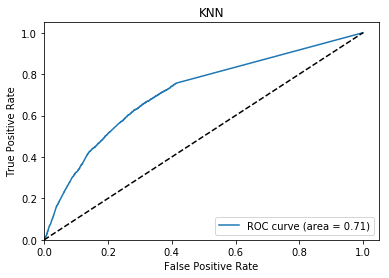

In [20]:
evaluate.plot_roc("KNN", probs[::,1],y_test)

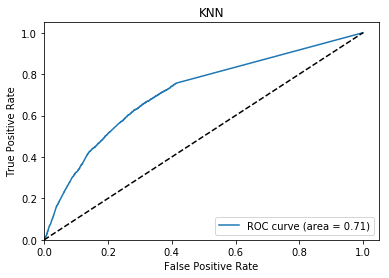

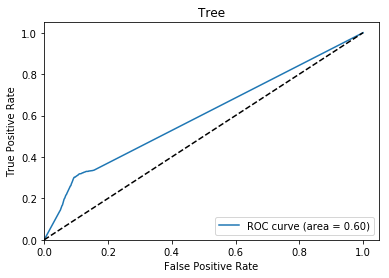

/Users/ZHU/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


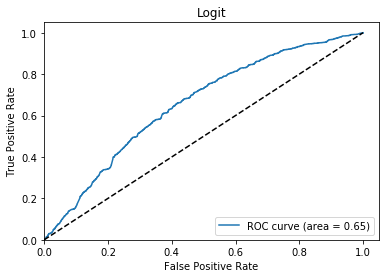

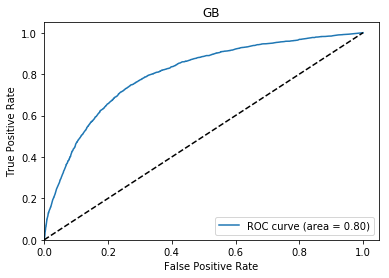

In [22]:
# Evaluate other classifier/model
models = ['KNN','Tree','Logit','GB']
for m in models:
    (yhat, probs) = classifier.classifier(m,X_train, X_test, y_train)
    (confusion_matrix, report) = evaluate.evaluate(y_test, yhat)
    evaluate.plot_roc(m, probs[::,1],y_test)

In [ ]:
# GB calssifier fits the data better